# Abstract:
In this project, a natural language processing (NLP) model is developed to predict person's personality type using Myers Briggs Personality test (MBTI).


# Introduction:
The Myers–Briggs Type Indicator (MBTI) is an introspective self-report questionnaire indicating differing psychological preferences in how people perceive the world and make decisions. The test attempts to assign four categories: introversion or extraversion, sensing or intuition, thinking or feeling, judging or perceiving. One letter from each category is taken to produce a four-letter test result, like "INFJ" or "ENFP". (Source: Wikipedia)

This project has wide range of business applications. If we know how certain people interact with their environment we can make proper recommendations to them. The recommendations can range from book, or movie recommendations to the next travel destination. For example, introverted people may want to be engaged in more relaxed activities in comparison to extroverts who like large parties and adventures.


# Dataset:
This project has four parts which look at different aspects of a person's personality. This notebook is looking at predicting "introvertedness" in people by analyzing their social media posts. Dataset for this project is mainly from kaggle website complemented by tweets consisting of personality tags. Dataset: https://www.kaggle.com/datasnaek/mbti-type The web scraping algorithm to acquire tweets is reflected at the end of this notebook in Apendix.



# Preprocessing:
The first part of the project is data exploration and preprocessing. Data exploration will give an intuition about how to go about the Machine learning algorithm. We are using supervised learning in which the data has been already labeled, however, we need to determine which posts are related to introverts.This can be done, for example, by looking at "I" in "INFP" and classifying those labels as an introvert person. Example below demonstrates how the data generally looks like:
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
type/posts (sample example of dataset)
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
type: INFJ.	                                                                                                                Post: and intj moments   sportscenter not top ten plays    pranks|||What has been the most life-changing experience in your life?|||  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390   ...|||Welcome and stuff.||| Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs.


In [56]:
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [57]:
dataset = pd.read_csv('mbti.csv')

In [58]:
D=dataset.iloc[:]

In [59]:
X = D.iloc[:, :-1].values
Y = D.iloc[:, -1].values

In [60]:
from collections import Counter
my_dt = pd.DataFrame(X)
Lx = [i[0] for i in my_dt.values.tolist()]
result = {}    
for word in Lx:                                                                                                                                                                                               
    result[word] = result.get(word, 0) + 1    

In [61]:
D={k: v for k, v in sorted(result.items(), key=lambda item: item[1])}

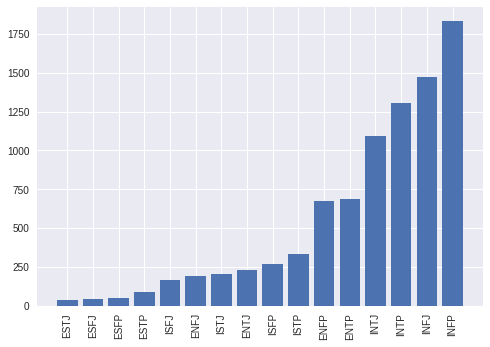

In [62]:
import matplotlib.pyplot as plt
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.xticks(rotation=90)
plt.show()

# Class imbalance:
There is a slight class-imbalance in a dataset in which some personality types are presented more than others. For example, there are 2000 extroverts and over 6000 introverts. To solve this issue, we balance the classes which showed a slight change in results.

In [63]:
I1=[]
I2=[]
I3=[]
N=0
St1="I"
St2="E"
for i in range (0,len(Y)):
    I1.append(Y[i])
    
    if X[i][0][N]==St1:
        I2.append(St1)
    
    if X[i][0][N]==St2:
        I2.append(St2)
        
    

In [64]:
my_dt = pd.DataFrame(I2)
Lx = [i[0] for i in my_dt.values.tolist()]
result = {}    
for word in Lx:                                                                                                                                                                                               
    result[word] = result.get(word, 0) + 1    
D={k: v for k, v in sorted(result.items(), key=lambda item: item[1])}
D

{'E': 1999, 'I': 6676}

In [65]:
I=[]
E=[]

for i in range (0,len(Y)):
    
    
    if X[i][0][N]==St1:
        T1=(St1,Y[i])
        I.append(T1)
    
    if X[i][0][N]==St2:
        T2=(St2,Y[i])
        E.append(T2)

In [66]:
I_balanced=(I[0:1999])

In [67]:
IEx=[]
IEy=[]
for el in I_balanced:
    IEy.append(el[0])
    IEx.append(el[1])
for El in E:
    IEy.append(El[0])
    IEx.append(El[1])

In [68]:
p1 = pd.Series([item for item in IEx ])
p2 = pd.Series([item for item in IEy])

II=pd.DataFrame({"words":p1,"I/E":p2})

# NLP model
I used the Spacy pre-trained NLP package which is popular and accurate. It will tokenize, lemmetize, and reduce the vector space by ignoring unimportant words such as am, is. 

For processing, TF/IDF bigram and unigram models are used which in addition to each word's TF/IDF, it also looks at two nearest words TF/IDF for more accurate results.


In [69]:
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
nlp = spacy.load('en_core_web_sm')

In [70]:
punctuations = string.punctuation

# Create our list of stopwords

stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    sentence= re.sub("[^a-zA-Z]"," ", sentence)
    sentence= re.sub(r'\b\w{1,3}\b', '', sentence)
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [71]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [72]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,2))

In [73]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [74]:
p1 = pd.Series([item for item in IEx ])
p2 = pd.Series([item for item in IEy])

II=pd.DataFrame({"words":p1,"I/E":p2})

In [75]:
type(I_balanced[10][1])

str

In [76]:
import re
IN=[]
for i in range(len(I_balanced)):
    s=spacy_tokenizer(I_balanced[i][1]) 
    IN.append(s)
    

In [77]:
IE=[]
for i in range(len(E)):
    s=spacy_tokenizer(E[i][1]) 
    IE.append(s)

# More data exploration:

This section explores the word frequency for the introverted and extroverted people. Word clouds can provide a nice visualization of more frequent words in the text. Following two figures are the 100 most frequent words for introverts and extroverts. The word "like'' is the most frequently used word in both categories. The first 100 words are pretty much equally used by both introverts and extroverts, however discrepancies appear for more-frequent words after 100. It is seen that extroverts use stronger words such as "hate" , "wrong" compared to introverts who use "nice", "sorry".




In [78]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([str(IN), str(IE)])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
TFIDF_PERS=pd.DataFrame({"I":df.iloc[0],"E":df.iloc[1]})

In [79]:
I=pd.DataFrame({"I":TFIDF_PERS["I"]}).sort_values('I',ascending=False)
E=pd.DataFrame({"E":TFIDF_PERS["E"]}).sort_values('E',ascending=False)

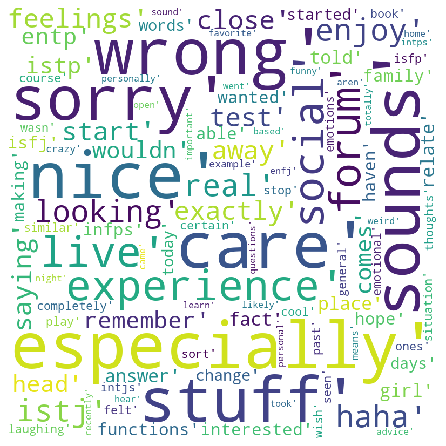

In [80]:
C=[]
for i in range(100,200):
    C.append(I.index[i])
C1=str(C)
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import pandas as pd 
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 5).generate(C1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

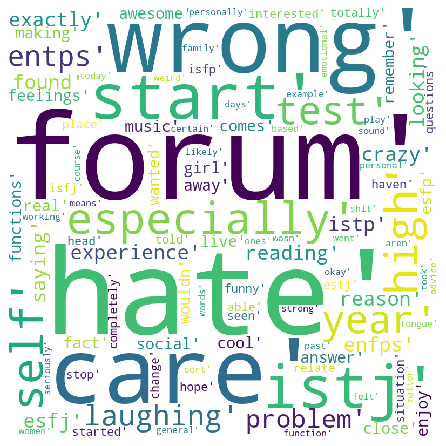

In [81]:
C=[]
for i in range(100,200):
    C.append(E.index[i])
C1=str(C)
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import pandas as pd 
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 5).generate(C1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Machine Learning:
Logistic regression was selected among 6 different classifiers showing the best results. Logistic regression utilizes the sigmoid function for classification and demonstrates the promising results in the NLP world.


In [82]:
from sklearn.utils import shuffle
II= shuffle(II)

In [83]:
import numpy as np
X_train=II["words"]
y_multilabel=np.c_[II["I/E"]]

In [84]:
from sklearn.preprocessing import OrdinalEncoder
Inp=y_multilabel

ordinal_encoder = OrdinalEncoder()
Iencd = ordinal_encoder.fit_transform(Inp)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train,Iencd, test_size = 0.2, random_state = 42)

In [86]:
import re
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
#Training the model using parameters from the grid search
classifier = LogisticRegression(penalty='l2',dual=False, tol=0.1, C=0.01, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=10,solver='liblinear', max_iter=500, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', OneVsRestClassifier(classifier))])

# model generation
pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7f2b9f12d110>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 2),
                                 tokenizer=<function spacy_tokenizer at 0x7f2bb291da70>)),
                ('classifier',
                 OneVsRestClassifier(estimator=LogisticRegression(C=0.01,
                                                                  max_iter=500,
                                                                  random_state=10,
                                                                  solver='liblinear',
                                                                  tol=0.1)))])

In [87]:
from sklearn.metrics import precision_score
predicted1 = pipe.predict(X_test)
precision_score(y_test, predicted1, average='macro')

0.7926059400241505

In [88]:
from sklearn import metrics
# Predicting with a test dataset
predicted1 = pipe.predict(X_test)
#sklearn.metrics.f1_score
print("logestic Accuracy:",metrics.f1_score(y_test, predicted1, labels=None, pos_label=1, average='micro', sample_weight=None, zero_division='warn'))


logestic Accuracy: 0.7925


In [89]:
import dill
import gzip
with gzip.open('model.dill.gzip', 'wb') as f:
    dill.dump(pipe, f, recurse=True)

# Model has 0.8 accuracy in recognizing introvertness in people's social media posts

The hyperparameter in logestic reggresion was obtained using Grid search cv which uses cross validation to optimize hyper parameters. 

# GRID SEARCH

In [90]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
gs = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('gs', gs)])


In [91]:
grid_result = pipe.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/opt/conda/envs/data3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best: 0.806851 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.800914 (0.020504) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.802373 (0.018629) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.795389 (0.018003) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.801643 (0.020293) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.802893 (0.018915) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.802581 (0.017775) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.802891 (0.019944) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.803309 (0.018804) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.803205 (0.018900) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.804454 (0.018450) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.804453 (0.018478) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.804245 (0.018760) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.806538 (0.019042) wi

In [92]:
print("The best hyperparameter value is: ", gs.best_params_)

The best hyperparameter value is:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


# Full Model:
Similar kind of methodology could be used to look at different asspects of personality in addition to introvetdness. Author expanded this model to look at sensing or intuition, thinking or feeling, judging or perceiving personality types.

# Interesting case study:

One intresting aplication for this study could be to make book recomendation for specific personality types. For example, if we analize the goodreads reviews and predict that Harry Potter reader are most likely introverts we can make book reccomendation for introverted people.

Following is the analysis of the personality type of two different Harry Potter series.

In [93]:
from sklearn import metrics
import requests
from bs4 import BeautifulSoup
url="https://www.goodreads.com/book/show/15881.Harry_Potter_and_the_Chamber_of_Secrets?ac=1&from_search=true&qid=XmkTPrJ2OK&rank=5"
response = requests.get(url).text
bs = BeautifulSoup(response, features='lxml')
Link_date=bs.select(".readable")
Link_date[1].text
B=[]
for l in Link_date:
    B.append(l.text)
s=[B for B in B if len(B)>250]

In [94]:
predicted2 = pipe.predict(s)

In [95]:
predicted2

array([1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 1.])

In [96]:
Introvert=0
Etrovert=0
import numpy as np
for i in range(len(predicted2)):
    if predicted2[i]==np.float64(1):
        Introvert=Introvert+1
    else:
        Etrovert=Etrovert+1
S1=Introvert/len(predicted2)
S2=Etrovert/len(predicted2)

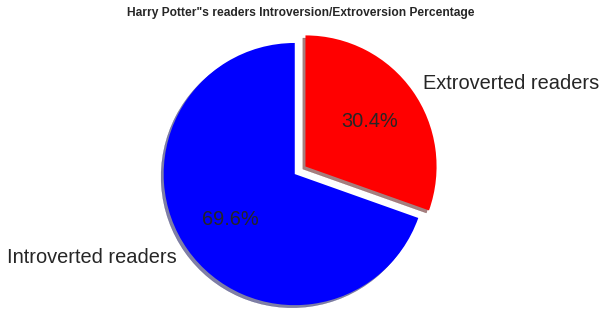

In [97]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Introverted readers', 'Extroverted readers'
color='blue','red'
sizes = [S1, S2]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
#fig1, ax1 = plt.subplots(nrows=3, ncols=2)
fig1, ax1 = plt.subplots(nrows=1, ncols=1)
ax1.pie(sizes, explode=explode, labels=labels, colors=color,  autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 20})
theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / 10) for i in range(10)])
ax1.set_title('Harry Potter"s readers Introversion/Extroversion Percentage', fontweight='bold')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Conclusion:
In this project I developed a NLP model to make prediction about people's personality. Knowing how people interact with their enviroment is a very important factor thet determines their likes/dislikes. Latter could be used to make reccomendation from choosing the next book to read or next travel destination or a movie.

# Appendix:
It is possible to expand Kaggle's MBTI dataset by web scraping the more recent tweets from twitter. You need to get twitter API access and use your consumer and secret keys to download relevant tweets. 




In [98]:
!pip install tweepy

In [99]:
import tweepy
consumer_key='nKzFqkTzhT697GAsiW16TlkUc'
consumer_secret='3dnxrzKtcG5BjXmX12lg7dySf99J9x23dn6PTjnPBwOYQsEXJz'

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

In the following code, I looked for 'ESTJ" tags in people's tweets and twitter IDs and complemented the Kaggle's dataset.

In [100]:
api = tweepy.API(auth)
Tx=[]
Tx1=[]
for tweet in tweepy.Cursor(api.search, q='ESTJ',lang='en').items(200):
    if len(tweet.text)>50:
        s=tweet.text
        s1=tweet
        Tx.append(s)
        Tx1.append(s1)
Tx

['Far from the noise and glare of the city, a miraculous, clairvoyant blue-eyed ESTJ baroness, rabidly unbuttoning an… https://t.co/rfXadnqLzS',
 'M!ENTP: Why hello, mate. What a lovely chewsday today is, innit ??\nF!INTP: What is he doing🤨\nM!ISTJ: You have been… https://t.co/cfCO9E4vYV',
 'I think my new work partner is an ESTJ and I’ve never seen a more refreshing manifestation of Te.',
 "@hourlydejun really? same MBTI as haechan lucas??😭\nI've read xiaojun is ESTJ tho, but I don't know 😂",
 '@W0NGDERY i just did the test and it says im an estj',
 'RT @umstudy: ☰ heyo welcome to my page ; \n\n➻ call me maya\n➻ she/her, 21\n➻ accounting student \n➻ likes : kdramas, kpop, anime, coffee\n➻ estj…',
 'my mom is also infact an estj thats crazy yes this is my life simplified in twitter out of context screenshots',
 'M!ESTJ: “Finally! Someone just like me!” https://t.co/sMEUpwzSa3',
 "Didn't I tell you? About a sweetly sentimental blue-eyed ESTJ detective novel writer, throwing aside a blue


In the following code, I used Spacy for pre-processing. This code will look at complete sentences in tweets. Complete sentence will include a "NOUN", "PROPN", "PRON", and "VERB". This will filter out noises and meaningless tweets.


In [101]:
d={}
import spacy
nlp = spacy.load("en_core_web_sm")
for t in Tx:   
    doc = nlp(t)
    for sent in doc.sents:
        if sent[0].is_title and sent[-1].is_punct:
            has_noun = 2
            has_verb = 1
            for token in sent:
                if token.pos_ in ["NOUN", "PROPN", "PRON"]:
                    has_noun -= 1
                elif token.pos_ == "VERB":
                    has_verb -= 1
            if has_noun < 1 and has_verb < 1:
                 d[sent.string.strip()]=1

In [102]:
d

{"Didn't I tell you?": 1,
 'What do you seek the most ?': 1,
 'What do YOU like about your type?': 1,
 'Far from the noise and clamor of the city, a mystical and breathtaking Japanese ESTJ colleen, surreptitiously repos…': 1,
 'My favorite ESTJ accepted my friend request!': 1,
 '⁃I don’t think they like me.': 1,
 'I just found myself questioning the way I answered things...': 1,
 'The Decisive Leader\n\nESTJs are known as objective, efficient, and fair leaders.': 1,
 'As Extraverted Thinking (Te) type…': 1,
 'Your most admired ability, according to your MBTI personality type.': 1,
 '-Eden Escapism [F!ISFJ x F!ENFP] ((i really like this one))\n-Bromance [M!ESTP x M!ENTP]\n-Fenci…': 1,
 '-Eden Escapism [F!ISFJ x F!ENFP] ((i really like this one))\n-Bromance [M!ESTP x M!EN…': 1,
 "I'm not surprised they don't feel welcomed.": 1,
 'That sounds exactly like something an ESTJ would say.': 1,
 'I HAVE A SHIP NAME FOR M!ESFP X M!ESTJ!!!': 1,
 "I'm joining this branch of Twitter asap.": 1,
 "Fr